<a href="https://colab.research.google.com/github/ADZRABARAKURA/Predicting_Diseases-pet-project/blob/Prostate_Cancer/prostate_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files


uploaded = files.upload()

Saving Prostate_Cancer.csv to Prostate_Cancer.csv


In [9]:
data = pd.read_csv('/content/Prostate_Cancer.csv')

In [10]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [12]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [13]:
data = data.drop(['id'], axis=1)

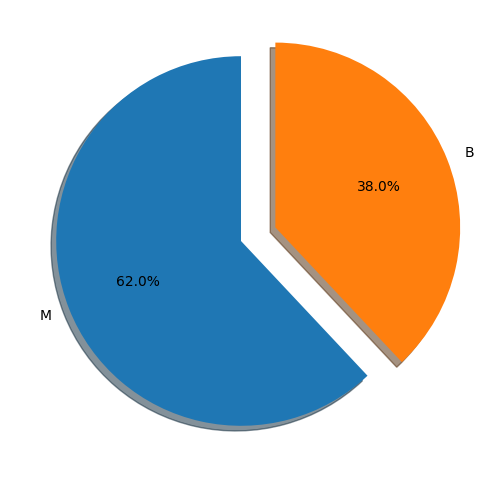

In [14]:
data_dr = data['diagnosis_result'].value_counts()

label = [data_dr.index.tolist()]
plt.pie(data_dr, labels=label[0], shadow=True, explode=(0.0, 0.2), autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

In [15]:
data['diagnosis_result'].replace({'M':0,'B':1},inplace=True)

<Axes: >

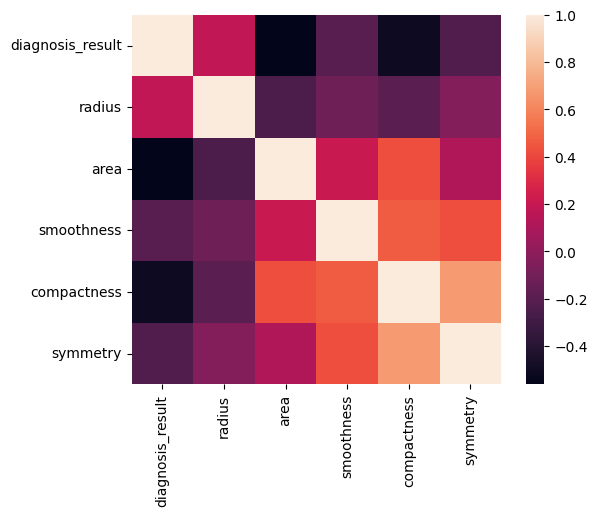

In [23]:
corr_metrics = data.corr()
corr_metrics.style.background_gradient()
sns.heatmap(corr_metrics, square = True)


In [ ]:
# Мы получаем тепловую карту корреляции между переменными. Цветовая палитра сбоку показывает степень корреляции между переменными. Более светлый оттенок указывает на высокую корреляцию.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


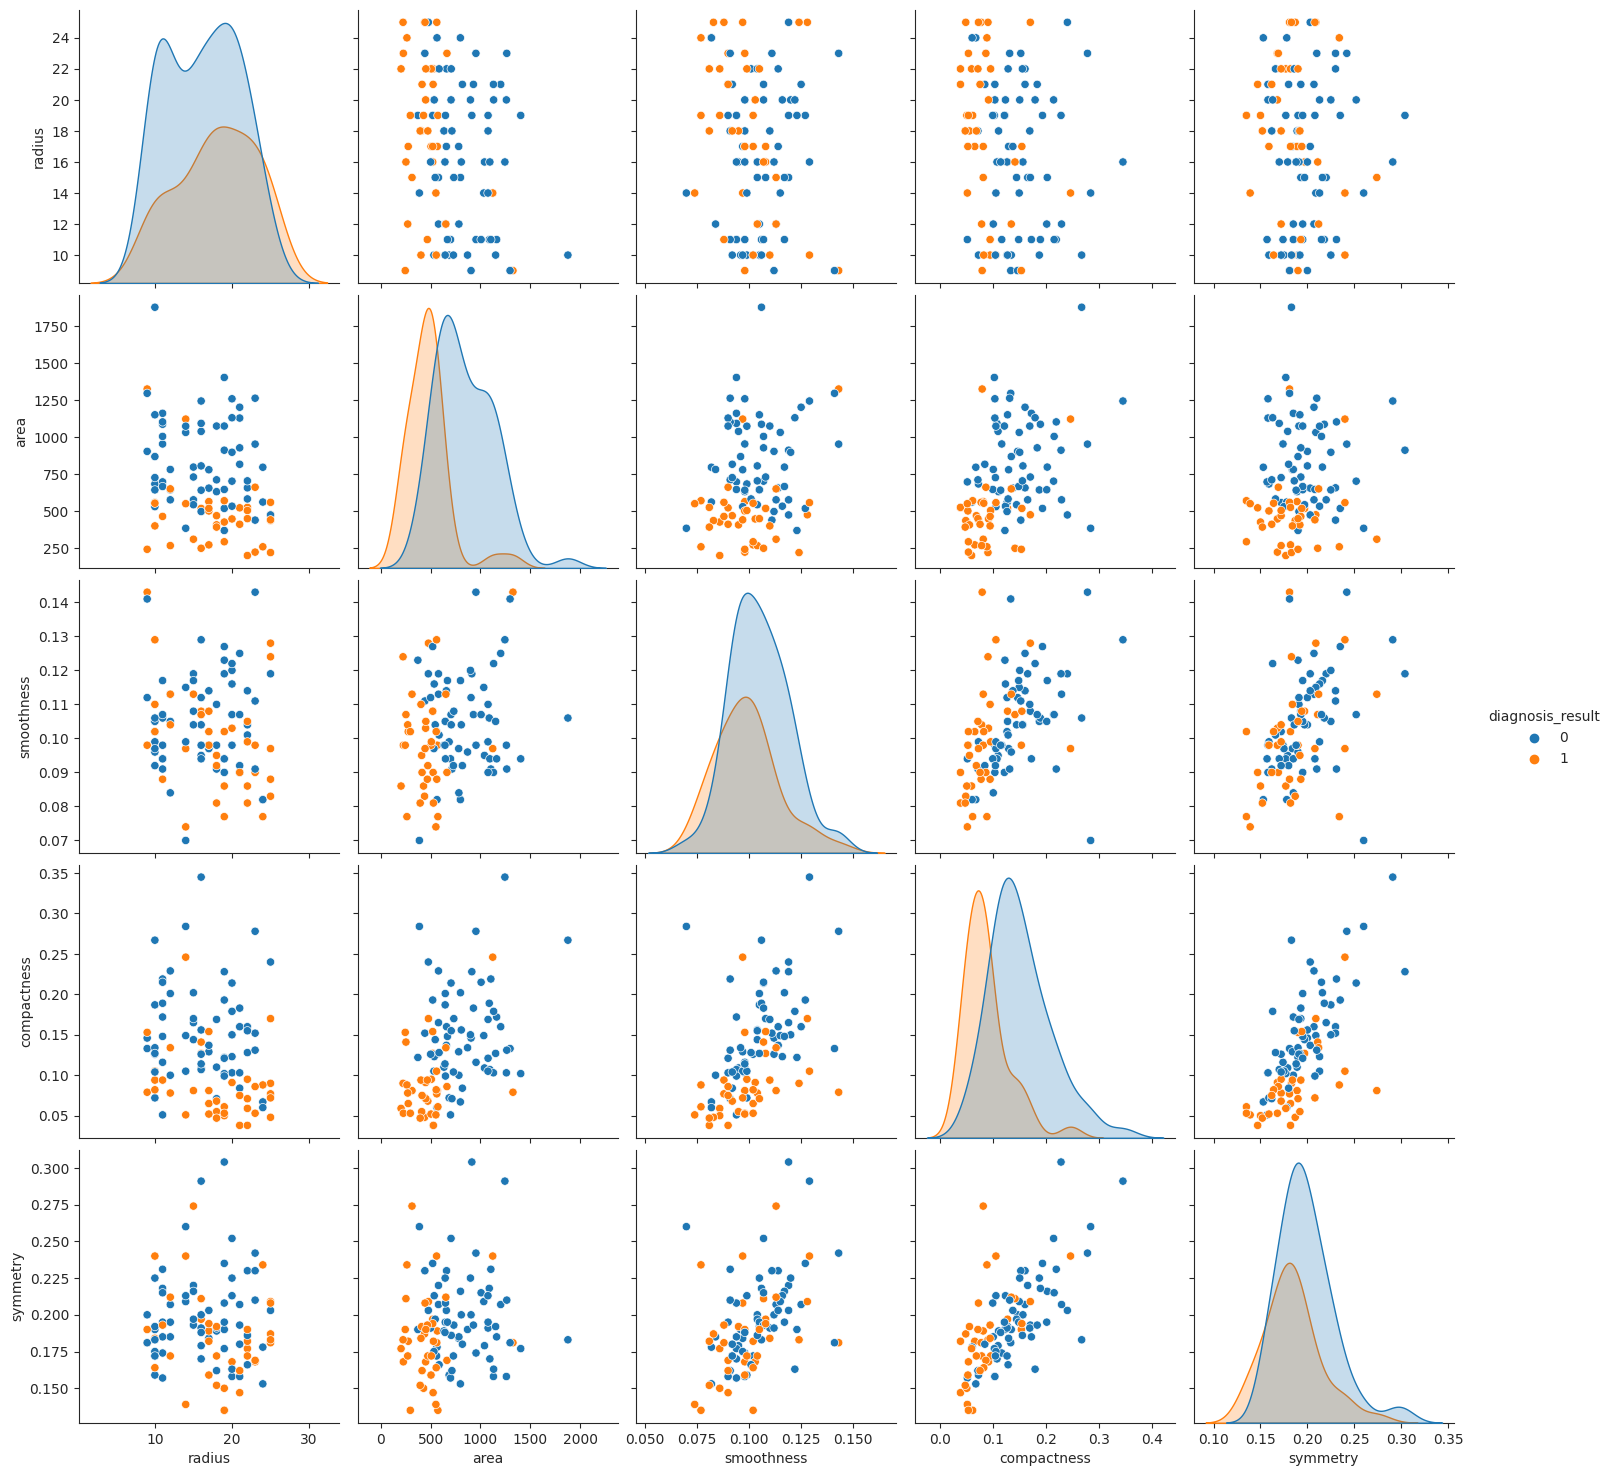

In [27]:

sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis_result",size=3);
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
Y = data['diagnosis_result']
X = data.drop(columns=['diagnosis_result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [30]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (80, 5)
Y train shape:  (80,)
X test shape:  (20, 5)
Y test shape:  (20,)


In [ ]:
#Логистическая регрессия

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10)

# обучение модели
logreg.fit(X_train, Y_train)

# целевые значения
Y_predict1 = logreg.predict(X_test)

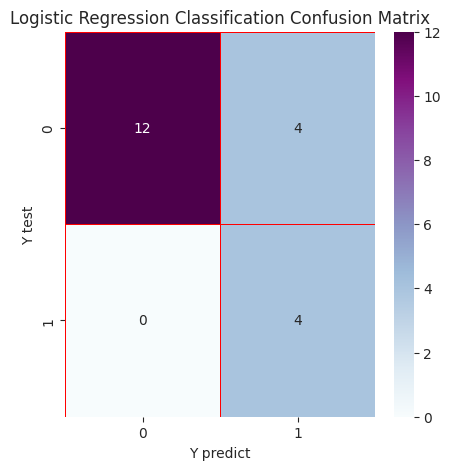

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [37]:
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.8
